In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

��Ŀ¼���ļ� -p �Ѿ����ڡ�
����: -p ʱ������
��Ŀ¼���ļ� input �Ѿ����ڡ�
����: input ʱ������
��Ŀ¼���ļ� -p �Ѿ����ڡ�
����: -p ʱ������
��Ŀ¼���ļ� outputs �Ѿ����ڡ�
����: outputs ʱ������


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:07, 15.90it/s]                         


Epoch 1 of 100
Generator loss: 4.13648176, Discriminator loss: 0.29867652


118it [00:06, 17.98it/s]                         


Epoch 2 of 100
Generator loss: 8.36323357, Discriminator loss: 0.16166389


118it [00:06, 18.17it/s]                         


Epoch 3 of 100
Generator loss: 7.75179672, Discriminator loss: 0.01192640


118it [00:06, 18.49it/s]                         


Epoch 4 of 100
Generator loss: 4.77732372, Discriminator loss: 0.52196014


118it [00:06, 18.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


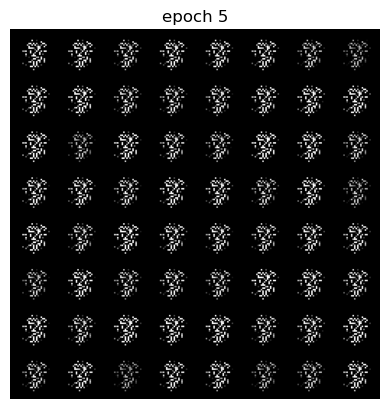

Epoch 5 of 100
Generator loss: 1.96662545, Discriminator loss: 1.92069876


118it [00:06, 18.38it/s]                         


Epoch 6 of 100
Generator loss: 3.16246867, Discriminator loss: 1.67336833


118it [00:06, 18.49it/s]                         


Epoch 7 of 100
Generator loss: 2.38696003, Discriminator loss: 0.57563764


118it [00:06, 18.32it/s]                         


Epoch 8 of 100
Generator loss: 3.82284546, Discriminator loss: 0.64055878


118it [00:06, 17.74it/s]                         


Epoch 9 of 100
Generator loss: 3.15497541, Discriminator loss: 0.70416796


118it [00:06, 17.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


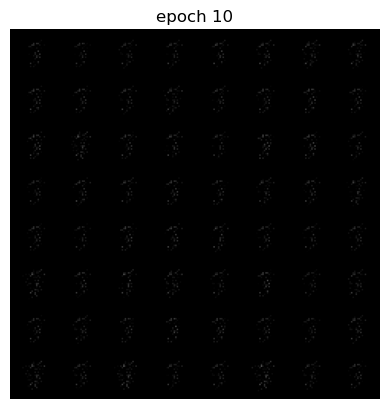

Epoch 10 of 100
Generator loss: 0.65572286, Discriminator loss: 1.35166764


118it [00:06, 18.30it/s]                         


Epoch 11 of 100
Generator loss: 1.70674348, Discriminator loss: 0.74996948


118it [00:06, 18.25it/s]                         


Epoch 12 of 100
Generator loss: 1.98122358, Discriminator loss: 0.53599668


118it [00:06, 18.17it/s]                         


Epoch 13 of 100
Generator loss: 2.02700996, Discriminator loss: 0.40402544


118it [00:06, 18.06it/s]                         


Epoch 14 of 100
Generator loss: 4.92570782, Discriminator loss: 0.37937760


118it [00:06, 18.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


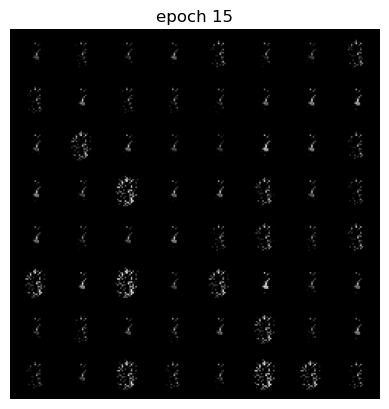

Epoch 15 of 100
Generator loss: 2.70481396, Discriminator loss: 0.55644250


118it [00:06, 16.99it/s]                         


Epoch 16 of 100
Generator loss: 3.61236072, Discriminator loss: 0.48082912


118it [00:07, 14.89it/s]                         


Epoch 17 of 100
Generator loss: 3.85276651, Discriminator loss: 0.40115970


118it [00:07, 15.29it/s]                         


Epoch 18 of 100
Generator loss: 3.83311009, Discriminator loss: 0.56347597


118it [00:07, 15.57it/s]                         


Epoch 19 of 100
Generator loss: 4.39402962, Discriminator loss: 0.23500362


118it [00:07, 15.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


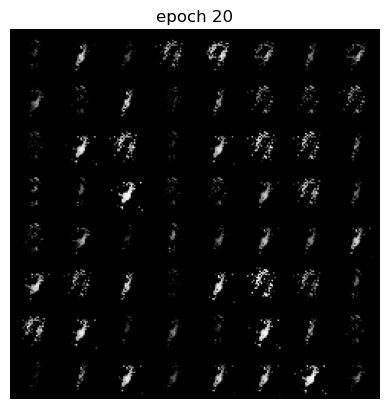

Epoch 20 of 100
Generator loss: 3.86081028, Discriminator loss: 0.32060498


118it [00:07, 16.62it/s]                         


Epoch 21 of 100
Generator loss: 3.41990113, Discriminator loss: 0.24302989


118it [00:07, 15.11it/s]                         


Epoch 22 of 100
Generator loss: 3.34161949, Discriminator loss: 0.46760935


118it [00:08, 14.39it/s]                         


Epoch 23 of 100
Generator loss: 3.11841011, Discriminator loss: 0.41486609


118it [00:07, 15.30it/s]                         


Epoch 24 of 100
Generator loss: 2.88874125, Discriminator loss: 0.33126196


118it [00:07, 15.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


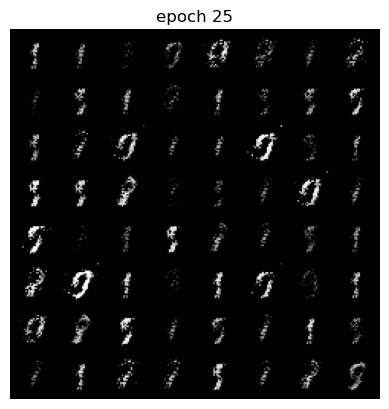

Epoch 25 of 100
Generator loss: 4.28007412, Discriminator loss: 0.44835949


118it [00:07, 15.70it/s]                         


Epoch 26 of 100
Generator loss: 2.39998150, Discriminator loss: 0.67329472


118it [00:07, 15.56it/s]                         


Epoch 27 of 100
Generator loss: 2.47603846, Discriminator loss: 0.38048533


118it [00:07, 15.05it/s]                         


Epoch 28 of 100
Generator loss: 2.21986485, Discriminator loss: 0.53209102


118it [00:07, 15.02it/s]                         


Epoch 29 of 100
Generator loss: 2.95309162, Discriminator loss: 0.57653594


118it [00:07, 15.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


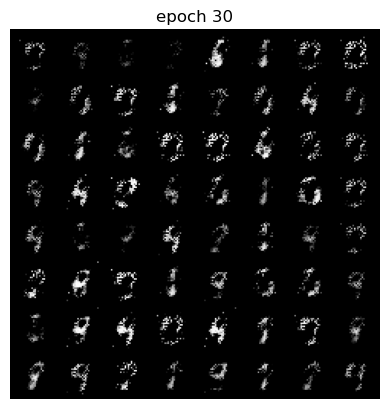

Epoch 30 of 100
Generator loss: 4.26163483, Discriminator loss: 0.58450413


118it [00:07, 15.39it/s]                         


Epoch 31 of 100
Generator loss: 2.58316231, Discriminator loss: 0.74044472


118it [00:07, 15.05it/s]                         


Epoch 32 of 100
Generator loss: 2.60587597, Discriminator loss: 0.51779419


118it [00:07, 15.58it/s]                         


Epoch 33 of 100
Generator loss: 3.20046329, Discriminator loss: 0.33639407


118it [00:07, 14.95it/s]                         


Epoch 34 of 100
Generator loss: 2.76456857, Discriminator loss: 0.50057459


118it [00:07, 15.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


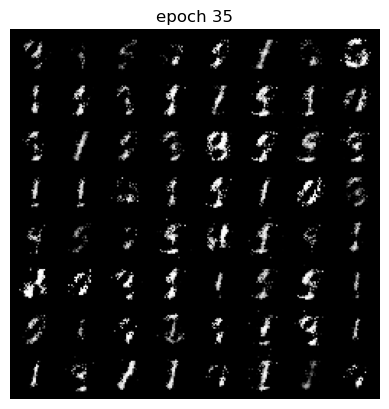

Epoch 35 of 100
Generator loss: 1.84072721, Discriminator loss: 0.75269723


118it [00:07, 15.24it/s]                         


Epoch 36 of 100
Generator loss: 2.41780949, Discriminator loss: 0.32977343


118it [00:07, 15.08it/s]                         


Epoch 37 of 100
Generator loss: 2.89387774, Discriminator loss: 0.84587157


118it [00:07, 15.81it/s]                         


Epoch 38 of 100
Generator loss: 2.70782542, Discriminator loss: 0.47938430


118it [00:07, 15.83it/s]                         


Epoch 39 of 100
Generator loss: 2.76839280, Discriminator loss: 0.49325660


118it [00:07, 16.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


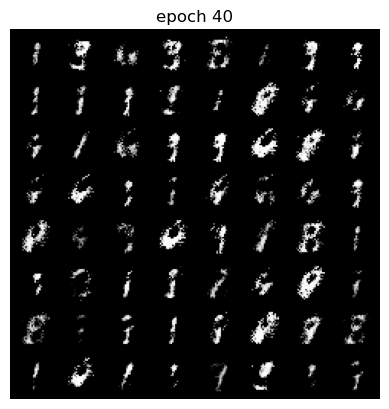

Epoch 40 of 100
Generator loss: 1.64770269, Discriminator loss: 1.28083193


118it [00:07, 16.25it/s]                         


Epoch 41 of 100
Generator loss: 1.82846546, Discriminator loss: 0.54949838


118it [00:07, 16.28it/s]                         


Epoch 42 of 100
Generator loss: 3.37216115, Discriminator loss: 0.56058991


118it [00:07, 16.03it/s]                         


Epoch 43 of 100
Generator loss: 2.22392774, Discriminator loss: 0.80549085


118it [00:07, 16.29it/s]                         


Epoch 44 of 100
Generator loss: 1.97374356, Discriminator loss: 0.80459929


118it [00:07, 16.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


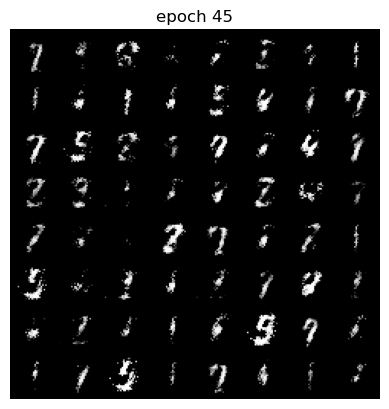

Epoch 45 of 100
Generator loss: 2.79483747, Discriminator loss: 0.57458854


118it [00:07, 16.24it/s]                         


Epoch 46 of 100
Generator loss: 2.96411800, Discriminator loss: 0.68978959


118it [00:07, 16.10it/s]                         


Epoch 47 of 100
Generator loss: 2.55491233, Discriminator loss: 0.46497935


118it [00:06, 16.98it/s]                         


Epoch 48 of 100
Generator loss: 3.28514051, Discriminator loss: 0.53959048


118it [00:07, 16.63it/s]                         


Epoch 49 of 100
Generator loss: 2.98180389, Discriminator loss: 0.57602835


118it [00:07, 15.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


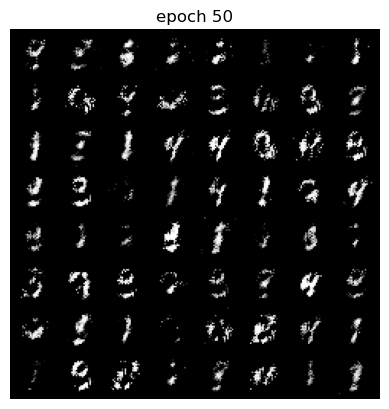

Epoch 50 of 100
Generator loss: 2.66667080, Discriminator loss: 0.48005483


118it [00:07, 16.33it/s]                         


Epoch 51 of 100
Generator loss: 2.86264825, Discriminator loss: 0.85043675


118it [00:07, 16.70it/s]                         


Epoch 52 of 100
Generator loss: 2.30294752, Discriminator loss: 0.72070146


118it [00:07, 16.35it/s]                         


Epoch 53 of 100
Generator loss: 2.30267215, Discriminator loss: 0.62500042


118it [00:07, 16.74it/s]                         


Epoch 54 of 100
Generator loss: 2.50893140, Discriminator loss: 0.73091710


118it [00:06, 17.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


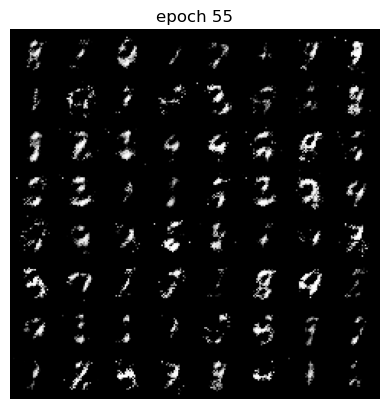

Epoch 55 of 100
Generator loss: 2.22473907, Discriminator loss: 0.74863535


118it [00:06, 17.35it/s]                         


Epoch 56 of 100
Generator loss: 2.99759364, Discriminator loss: 0.52594405


118it [00:07, 16.19it/s]                         


Epoch 57 of 100
Generator loss: 2.75987983, Discriminator loss: 0.75078267


118it [00:07, 15.20it/s]                         


Epoch 58 of 100
Generator loss: 3.01763368, Discriminator loss: 0.55943155


118it [00:07, 15.67it/s]                         


Epoch 59 of 100
Generator loss: 2.21230078, Discriminator loss: 0.52282500


118it [00:07, 16.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


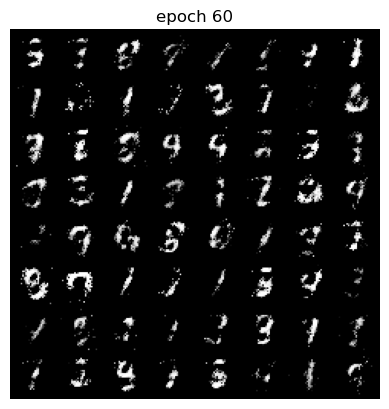

Epoch 60 of 100
Generator loss: 2.37335014, Discriminator loss: 0.77126026


118it [00:07, 15.56it/s]                         


Epoch 61 of 100
Generator loss: 1.71915090, Discriminator loss: 0.70183486


118it [00:07, 15.78it/s]                         


Epoch 62 of 100
Generator loss: 2.22161818, Discriminator loss: 0.72884572


118it [00:07, 15.91it/s]                         


Epoch 63 of 100
Generator loss: 1.86675406, Discriminator loss: 0.79081833


118it [00:07, 16.23it/s]                         


Epoch 64 of 100
Generator loss: 1.49825668, Discriminator loss: 1.05833244


118it [00:08, 14.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


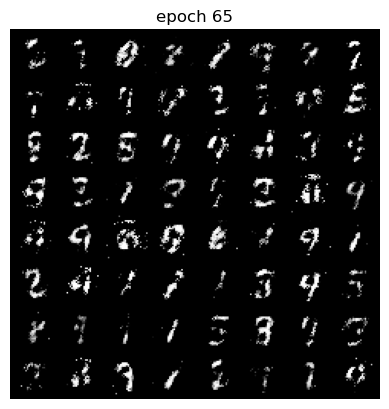

Epoch 65 of 100
Generator loss: 2.41790581, Discriminator loss: 0.50438929


118it [00:07, 15.34it/s]                         


Epoch 66 of 100
Generator loss: 2.23662472, Discriminator loss: 1.14343691


118it [00:07, 16.06it/s]                         


Epoch 67 of 100
Generator loss: 1.71498692, Discriminator loss: 0.69101542


118it [00:07, 15.17it/s]                         


Epoch 68 of 100
Generator loss: 2.02681208, Discriminator loss: 0.65743423


118it [00:07, 15.30it/s]                         


Epoch 69 of 100
Generator loss: 1.92729318, Discriminator loss: 0.78518695


118it [00:07, 14.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


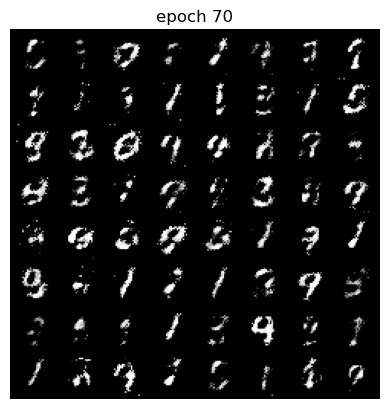

Epoch 70 of 100
Generator loss: 2.14448738, Discriminator loss: 0.73749590


118it [00:07, 15.72it/s]                         


Epoch 71 of 100
Generator loss: 1.95283961, Discriminator loss: 0.81181562


118it [00:07, 15.94it/s]                         


Epoch 72 of 100
Generator loss: 1.83075809, Discriminator loss: 0.85771668


118it [00:07, 15.65it/s]                         


Epoch 73 of 100
Generator loss: 1.89341879, Discriminator loss: 0.71585727


118it [00:07, 15.40it/s]                         


Epoch 74 of 100
Generator loss: 2.12704802, Discriminator loss: 0.66491926


118it [00:07, 15.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


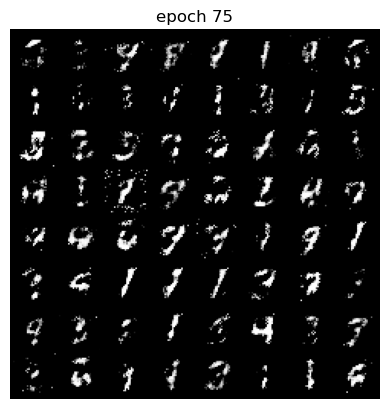

Epoch 75 of 100
Generator loss: 2.26631355, Discriminator loss: 0.69939792


118it [00:07, 15.46it/s]                         


Epoch 76 of 100
Generator loss: 1.82664728, Discriminator loss: 0.70315391


118it [00:07, 16.02it/s]                         


Epoch 77 of 100
Generator loss: 1.71109784, Discriminator loss: 0.49330801


118it [00:07, 15.61it/s]                         


Epoch 78 of 100
Generator loss: 2.00837064, Discriminator loss: 0.72919321


118it [00:07, 15.54it/s]                         


Epoch 79 of 100
Generator loss: 1.97802401, Discriminator loss: 0.67323315


118it [00:07, 15.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


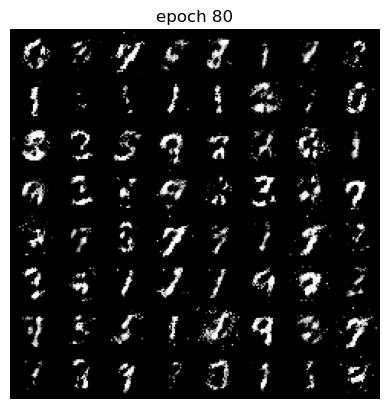

Epoch 80 of 100
Generator loss: 1.56231689, Discriminator loss: 0.81364071


118it [00:07, 15.52it/s]                         


Epoch 81 of 100
Generator loss: 2.40975308, Discriminator loss: 1.15775251


118it [00:07, 15.99it/s]                         


Epoch 82 of 100
Generator loss: 1.82477140, Discriminator loss: 0.84420532


118it [00:07, 15.83it/s]                         


Epoch 83 of 100
Generator loss: 1.50625372, Discriminator loss: 0.83447695


118it [00:07, 16.01it/s]                         


Epoch 84 of 100
Generator loss: 1.75951910, Discriminator loss: 0.74252343


118it [00:07, 16.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


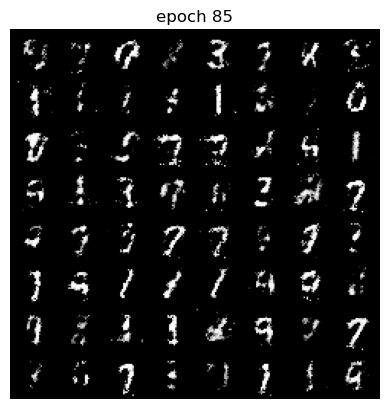

Epoch 85 of 100
Generator loss: 2.02498269, Discriminator loss: 0.71577924


118it [00:07, 16.44it/s]                         


Epoch 86 of 100
Generator loss: 1.59820867, Discriminator loss: 0.75102788


118it [00:07, 16.25it/s]                         


Epoch 87 of 100
Generator loss: 1.44926441, Discriminator loss: 0.99795514


118it [00:06, 17.31it/s]                         


Epoch 88 of 100
Generator loss: 2.04605770, Discriminator loss: 0.91794050


118it [00:06, 17.08it/s]                         


Epoch 89 of 100
Generator loss: 2.48436546, Discriminator loss: 0.61430138


118it [00:06, 17.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


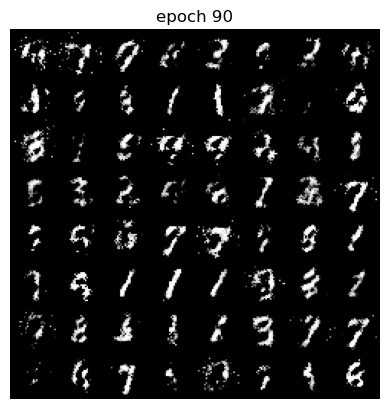

Epoch 90 of 100
Generator loss: 1.67906070, Discriminator loss: 0.88349211


118it [00:06, 17.42it/s]                         


Epoch 91 of 100
Generator loss: 1.93369126, Discriminator loss: 0.83232176


118it [00:06, 17.67it/s]                         


Epoch 92 of 100
Generator loss: 2.08820057, Discriminator loss: 1.14271379


118it [00:06, 18.02it/s]                         


Epoch 93 of 100
Generator loss: 1.54775596, Discriminator loss: 0.97881490


118it [00:06, 17.79it/s]                         


Epoch 94 of 100
Generator loss: 2.13105965, Discriminator loss: 0.69340932


118it [00:06, 16.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


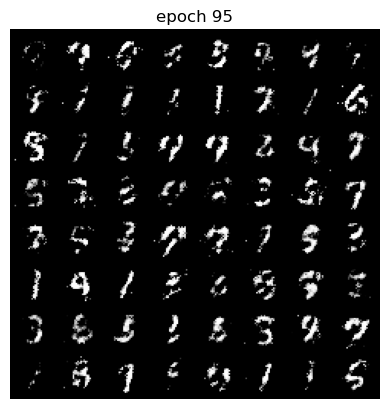

Epoch 95 of 100
Generator loss: 1.52142096, Discriminator loss: 0.94069099


118it [00:06, 17.03it/s]                         


Epoch 96 of 100
Generator loss: 1.49584556, Discriminator loss: 0.93530995


118it [00:06, 17.34it/s]                         


Epoch 97 of 100
Generator loss: 2.17338943, Discriminator loss: 0.74414659


118it [00:06, 17.27it/s]                         


Epoch 98 of 100
Generator loss: 1.86389256, Discriminator loss: 0.98420799


118it [00:07, 16.55it/s]                         


Epoch 99 of 100
Generator loss: 1.67460680, Discriminator loss: 0.80286860


118it [00:06, 17.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


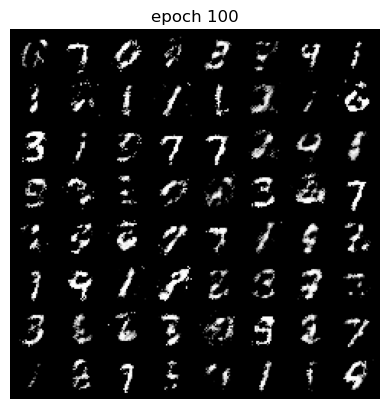

Epoch 100 of 100
Generator loss: 1.48479939, Discriminator loss: 1.05192161


In [14]:
torch.manual_seed(7777)

def generator_loss(fake_output, sample_size):
    ############ YOUR CODE HERE ##########
    loss_g = criterion(fake_output, label_real(sample_size))
    return loss_g
    ######################################

def generator_loss_2(fake_output, sample_size):
    ############ YOUR CODE HERE ##########
    loss_g = - criterion(fake_output, label_fake(sample_size))
    return loss_g
    ######################################
    
def discriminator_loss(fake_output, fake_label, real_output, real_label):
    ############ YOUR CODE HERE ##########
    loss_d = criterion(fake_output, fake_label) + criterion(real_output, real_label)
    return loss_d
    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        # get the data
        real, _ = data
        real = real.to(device)
    
        # train the discriminator
        for _ in range(k):
            # generate fake images
            fake = generator(create_noise(sample_size, nz))
            # get the loss for the discriminator
            loss_d = discriminator_loss(discriminator(fake), label_fake(sample_size), discriminator(real), label_real(real.size(0)))
            # optimize the discriminator
            optim_d.zero_grad()
            loss_d.backward()
            optim_d.step()
    
        # train the generator
        # generate fake images
        fake = generator(create_noise(sample_size, nz))
        # get the loss for the generator
        loss_g = generator_loss(discriminator(fake), sample_size)
        # optimize the generator
        optim_g.zero_grad()
        loss_g.backward()
        optim_g.step()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g # total generator loss for the epoch
    epoch_loss_d = loss_d # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

In [17]:
for i in range(len(losses_g)):
    losses_g[i] = np.array(losses_g[i].cpu().detach().numpy())
    
for i in range(len(losses_d)):
    losses_d[i] = np.array(losses_d[i].cpu().detach().numpy())

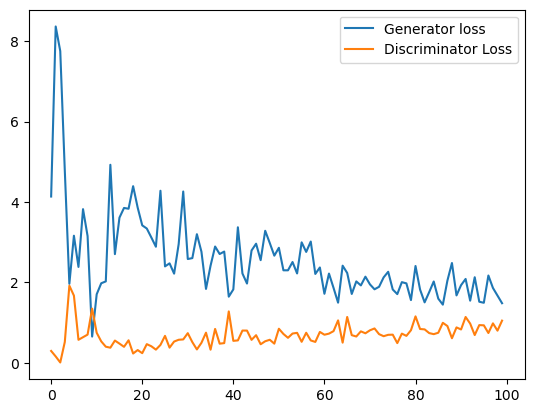

In [18]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')